In [39]:
import pandas as pd
all_years_antibiotic_rate=pd.read_csv('/Users/saarthak/all_yrs_rate.csv', index_col=0)
antibiotic_20_days_after_covid = pd.read_csv('/Users/saarthak/covid_anti_20_rate.csv', index_col=0)
no_history_antibiotic_rate=pd.read_csv('/Users/saarthak/Downloads/covidNoHistoryCountByZip.csv', index_col=0)
all_years_antibiotic_rate=all_years_antibiotic_rate.rename(columns={"zipcode": "zip"})
antibiotic_20_days_after_covid=antibiotic_20_days_after_covid.rename(columns={"Member Zip Code DOS": "zip"})
no_history_antibiotic_rate=no_history_antibiotic_rate.rename(columns={"Member Zip Code DOS": "zip"})

In [30]:
from geopandas import GeoDataFrame
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%config Completer.use_jedi = False

#Input data must have a cloumn called "zip" corresponding to VA zipcodes
def plot_heatmap(data, col_to_plot='rate', cmapType='OrRd', title=''):
    vazcdf=pd.read_csv('resources/VAzipcodes.csv')
    vazc=vazcdf.zip.astype(str).unique()
    vagdf=gpd.read_file('resources/va_zipcode_shape')
    vagdf=vagdf.rename(columns={'ZCTA5CE10':'zip'})
    data['zip']=data['zip'].astype(int)
    vagdf['zip']=vagdf['zip'].astype(int)
    vagdf=vagdf.merge(data,on='zip')

    fig,ax=plt.subplots(figsize=(10,12))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    vagdf.plot(column=col_to_plot,ax=ax,cmap=cmapType,legend=True,cax=cax) #viridis #OrRd
    ax.set_title(title)
    plt.savefig(title)

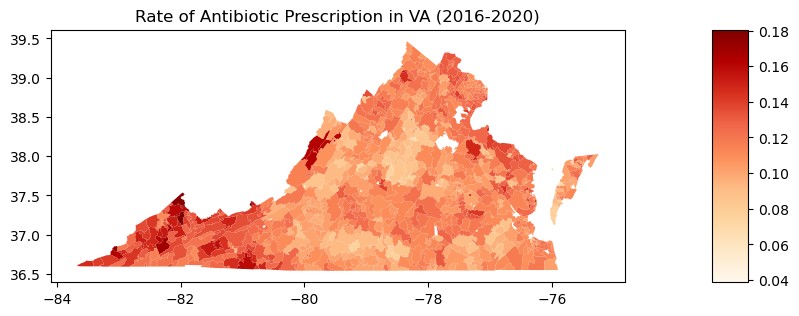

In [31]:
plot_heatmap(all_years_antibiotic_rate,'rate','OrRd','Rate of Antibiotic Prescription in VA (2016-2020)')

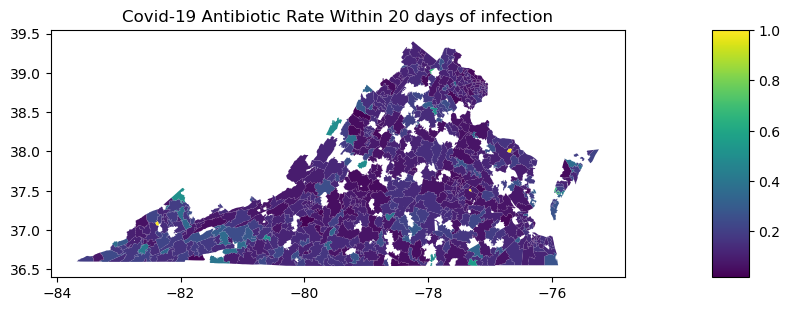

In [41]:
plot_heatmap(antibiotic_20_days_after_covid,'rate','viridis','Covid-19 Antibiotic Rate Within 20 days of infection')

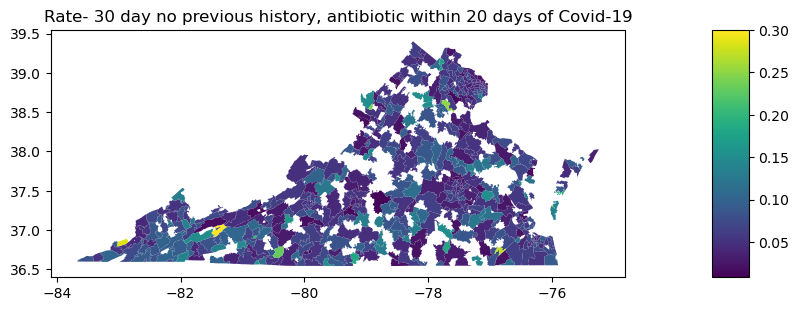

In [32]:
plot_heatmap(no_history_antibiotic_rate,'rate','viridis','Rate- 30 day no previous history, antibiotic within 20 days of Covid-19')

In [44]:
yearly_rate = pd.read_csv('/Users/saarthak/pres_rate_yearly.csv')
yearly_rate = yearly_rate.rename(columns={"zipcode": "zip"})

In [46]:
pd.options.mode.chained_assignment = None

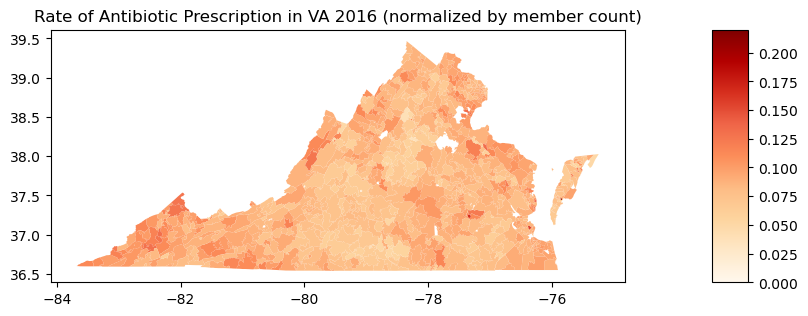

In [47]:
YEAR = 2016
yeardata = yearly_rate[yearly_rate['year']==YEAR]
plot_heatmap(yeardata,'rate','OrRd','Rate of Antibiotic Prescription in VA {} (normalized by member count)'.format(YEAR))

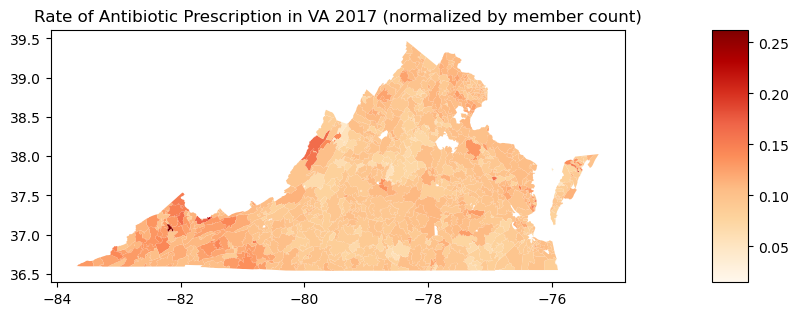

In [50]:
YEAR = 2017
yeardata = yearly_rate[yearly_rate['year']==YEAR]
plot_heatmap(yeardata,'rate','OrRd','Rate of Antibiotic Prescription in VA {} (normalized by member count)'.format(YEAR))

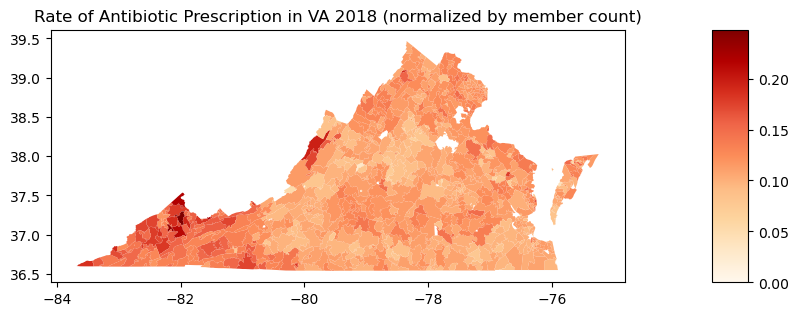

In [48]:
YEAR = 2018
yeardata = yearly_rate[yearly_rate['year']==YEAR]
plot_heatmap(yeardata,'rate','OrRd','Rate of Antibiotic Prescription in VA {} (normalized by member count)'.format(YEAR))

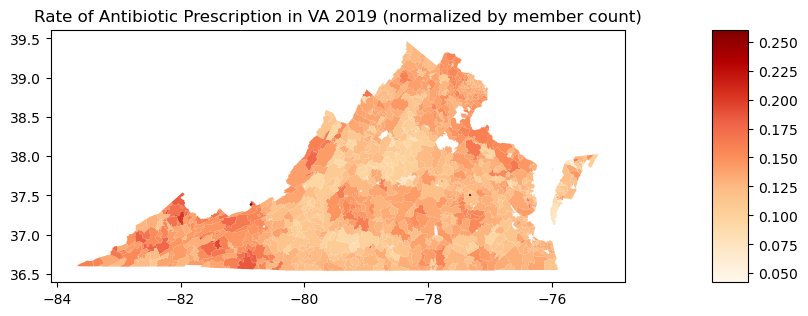

In [51]:
YEAR = 2019
yeardata = yearly_rate[yearly_rate['year']==YEAR]
plot_heatmap(yeardata,'rate','OrRd','Rate of Antibiotic Prescription in VA {} (normalized by member count)'.format(YEAR))

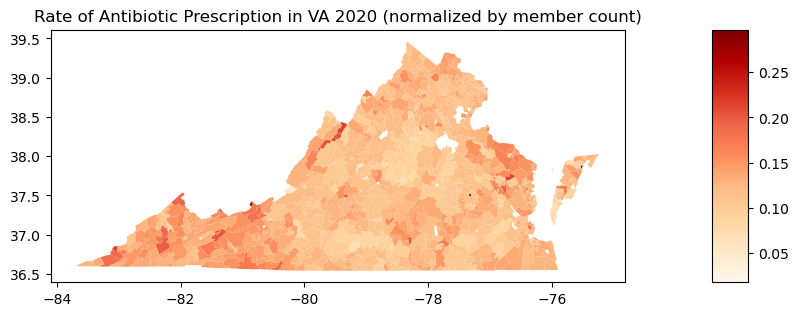

In [52]:
YEAR = 2020
yeardata = yearly_rate[yearly_rate['year']==YEAR]
plot_heatmap(yeardata,'rate','OrRd','Rate of Antibiotic Prescription in VA {} (normalized by member count)'.format(YEAR))